# Introduction

This report contains the dataset, code, and when executed, the charts used to research the topic of breast cancer for Fall 2025 INSY6500 at Auburn University. This report is written in the style of a professional lab report including notes from the authors to give insight into the research process used. The "Customer" in the case of this report is the entity that requested this team research this topic and it is assumed provided the data.


# Executive Summary

After skin cancers, breast cancer is the leading cause of cancer among women today. In the United States more than 40,000 women are expected to die from Breast cancer in 2025 and there are likely to be more than 300,000 new cases as well. This alone proves the need for breast cancer research to be ongoing and to find better ways of detecting it early. This report will identify statistical correlations between patients age, diagnosis and other records like tumor size and patient survivability to determine if any warning signs can be uncovered that are not obvious to the common person.

The dataset for this investigation was collected and provided to the analysis team by the customer to generate analytical questions for which the data can answer. The analysis team will then use Numpy, Pandas, and matplotlib to manipulate the dataset, clean the data for efficiency, and plot the data in order to draw conclusions.

The analysis team investigated if age or tumor size at initial diagnosis affects patient survivability, if early or less severe stages of cancer at initial diagnosis allows for longer survival times compared to more severe cancer stages of grades, and if the different stages or grades of cancer affect overall survivability of the patient population.

This report attempts to prove, based on the analysis, that age at initial diagnosis does not play a significant role in patient survivability, but tumor size can. The analysis team also shows earlier and less severe cases of cancer at initial diagnosis are related to longer survival times when compared to more severe stages at diagnosis and that the less severe the stage at diagnosis, the more likely the patient will survive treatment.

All findings point to the necessity of periodic breast cancer screening starting at no later than 45 years of age.

This report is accompanied by a slideshow presentation with narration by the analysis team and an interactive streamlit page published at the address linked below.

# Understanding the Data

The initial dataset used in this investigation has 16 total columns consisting of 1 index column and 15 columns containing various anonymous patient records. Table 1 includes the 15 column names and their descriptions.


### Table 1

| Column Name | Description | Data Type |
|---------|----------|----------|
| Age |Age of patient in years  | Numeric  |
| Race | Race of patient. “other” includes: <br> American Indian/AK Native, <br>Asian/Pacific Islander| Nominal
| Marital Status | Marital Status of patient. <br>Married, Divorced, etc.   | Nominal  |
| T Stage | Size of primary breast tumor as <br>a component of the TNM staging system.  <br>(T2, T3, T4, T5) Note: Adjusted AJCC 6th T| Ordinal  |
|N Stage| Stage at which the cancer has spread <br>to the near by lymph nodes (N1, N2, N3) <br> Note: Adjusted AJCC 6th | Ordinal  |
|6th Stage|Cancer stage based on the 6th edition of<br> the AJCC TNM staging system.<br> (IIA, IIB, IIIA, IIIB, IIIC)| Ordinal  |
|differentiate|Differentiation label refers to how well a<br> cancer cell appears and operates like <br>a normal breast cell.   | Ordinal  |
|Grade|The level of abnormality the cancer <br>cells appear and how fast they’re likely to grow.   | Ordinal  |
|A Stage|Regional — A neoplasm that has extended, <br>Distant — A neoplasm that has spread to parts <br>of the body remote from  | Ordinal  |
|Tumor Size|Size in milimeters  | Continuous  |
|Estrogen Status|Positive or Negative  | Boolean  |
|Progesteron Status|Positive or Negative  | Boolean  |
|Regional Node Examined|Value H  | Nominal  |
|Regional Node Positive|Value H  | Nominal  |
|Survival Months|Number of months the patient has <br>survived post diagnosis.   | Numeric  |
|Status|Is the patient ‘Alive’ or ‘Dead’ at the <br>time of the formation of the dataset.   | Binary  |

## A Note About the Data

There are a number of data points that are provided in this dataset that are poorly described by the customer or do not follow industry standard practices. Each problematic column of data will be addressed below. At the time of publishing, no comment was made by the customer to address these concerns.

#### Tumor Size

Tumor size does not indicate radius, diameter, or volume. It is assumed in this report the measurement was made of the largest radius measurable by the medical team.

#### Estrogen Status

No guidance was given as to what threshold was used to determine a positive result vs a negative one. The lack of a description prevents the analysis team from drawing conclusions using Estrogen Status as a variable.

#### Progesterone Status

No guidance was given as to what threshold was used to determine a positive result vs a negative one. The lack of a description prevents the analyis team from drawing conclusions using Progesterone Status as a variable.

#### Regional Node Examined

There is no industry standard which maps the regional node number referred to in this dataset with a commonly known lymph node in the human body. Though analysis can be done regarding which node was examined, it is up to the customer to interpret the results of the study.

#### Regional Node Positive

There is no industry standard which maps the regional node number referred to in this dataset with a commonly known lymph node in the human body. Though analysis can be done regarding which node was examined, it is up to the customer to interpret the results of the study.

#### Survival Months

Survival months indicates the number of months the patient survived beyond the initial diagnosis. Because the research team collected data over a period of time, some datapoints may skew results due to being collected later in the data collection process.

# The Data

The dataset was generally clean upon receipt, with no missing values. Many columns needed to have datatypes reassigned for efficiency and correctness. The dataset used has 4024 datapoints and 16 columns.

In [110]:
import matplotlib.pylab as plt
import pandas as pd
import sys
import numpy as np
import sklearn
import scipy
import matplotlib
import seaborn as sns
from scipy.stats import gaussian_kde
data_root = "https://raw.githubusercontent.com/mattressdog/data/refs/heads/main/"

In [111]:
#Data Cleaning
df = pd.read_csv(data_root + "Breast_Cancer_Primary.csv",
                 dtype={"Race": "string",
                        "Marital Status": "string",
                        "T Stage": "string",
                        "N Stage": "string",
                        "6th Stage": "string",
                        "differentiate": "string",
                        #"Grade": "int64",
                        "A Stage": "string",
                        #"ride_id": "string",
                        "Status": "string",})
df.columns = df.columns.str.strip()

In [112]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [113]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   string
 2   Marital Status          4024 non-null   string
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   string
 5   6th Stage               4024 non-null   string
 6   differentiate           4024 non-null   string
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   string
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [115]:
#Counts number of missing observations
#There appear to be none for this dataset
df.isna().sum()

,0
Age,0
Race,0
Marital Status,0
T Stage,0
N Stage,0
6th Stage,0
differentiate,0
Grade,0
A Stage,0
Tumor Size,0


# Univariate Analysis: A First Look

The following graphs in Figure 1 and Figure 2 examine the data from a high level, to give the customer an idea as to what the raw data looks like.

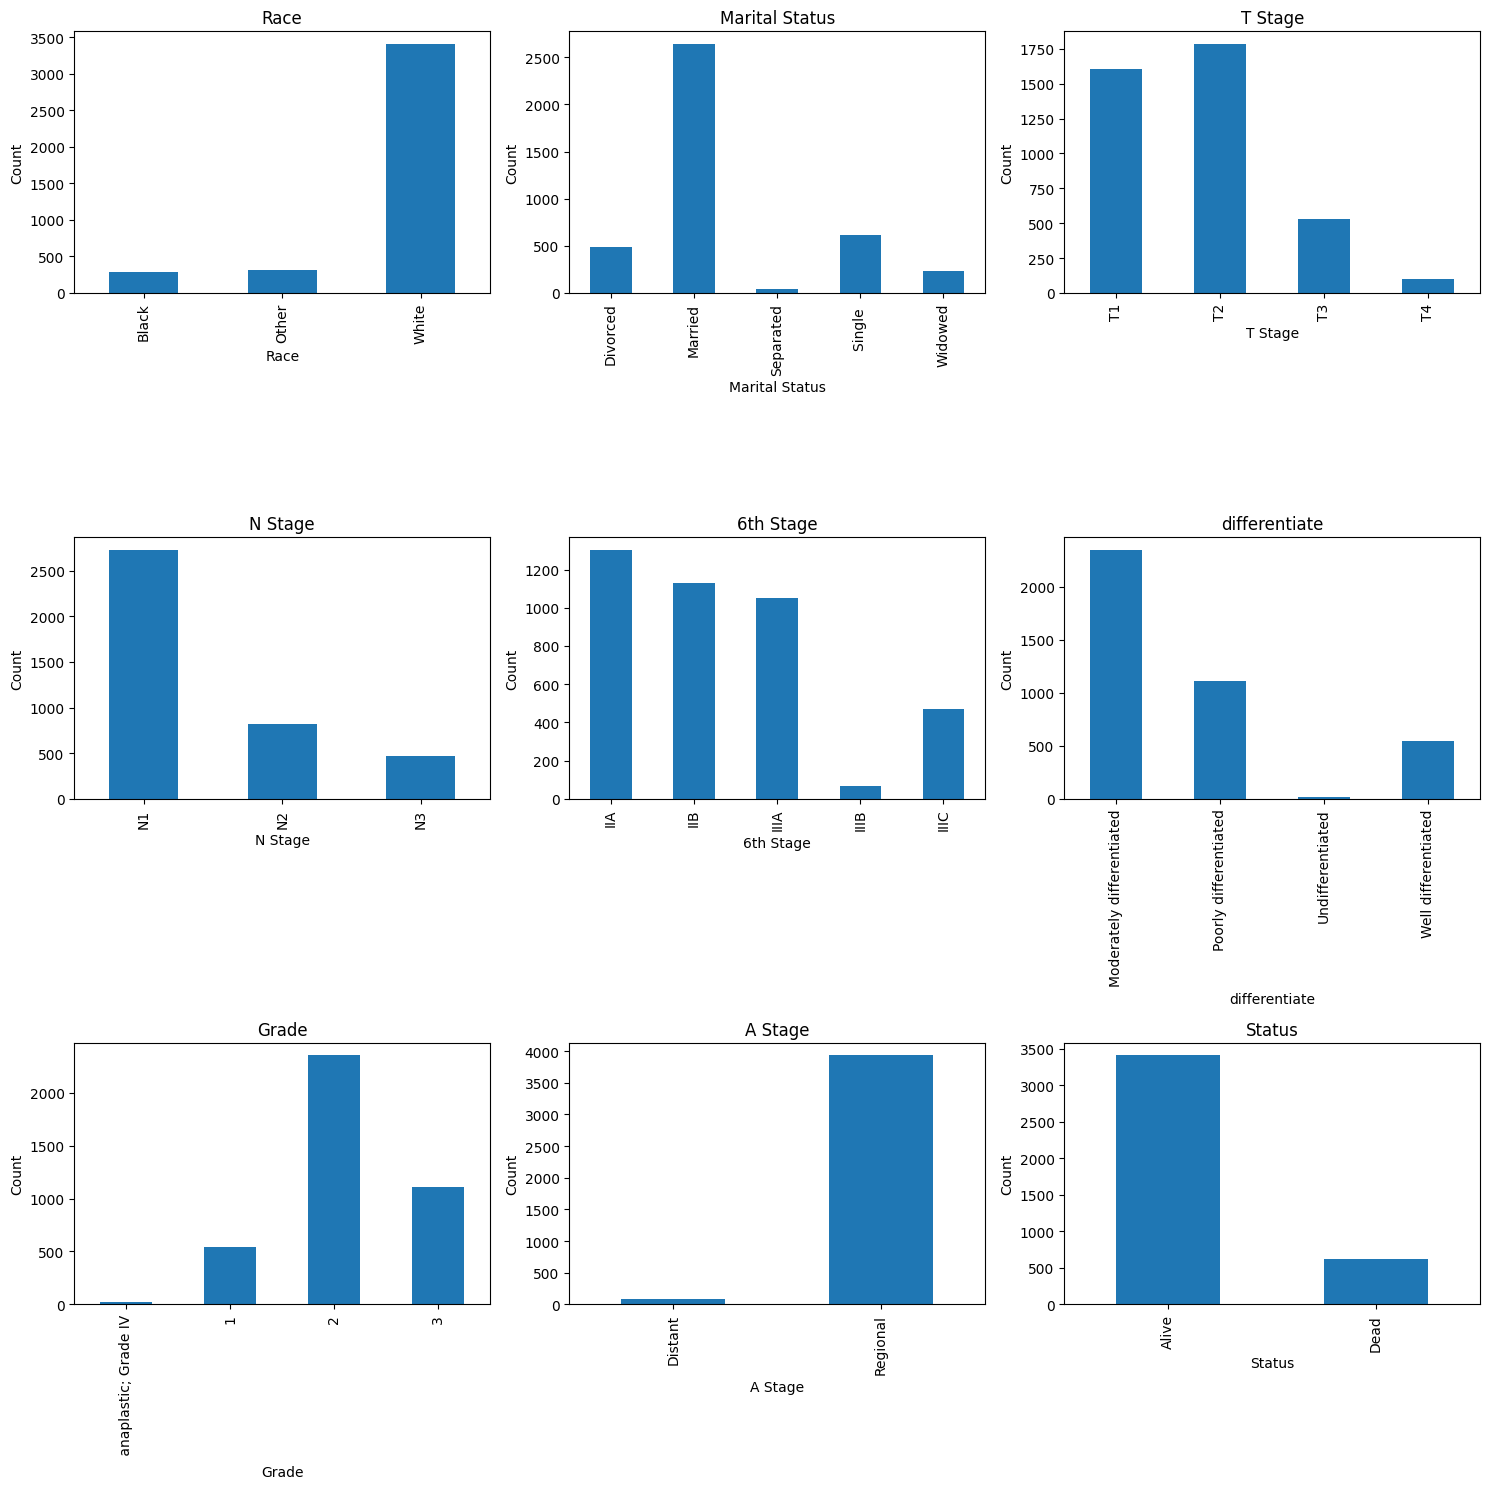

In [116]:
#Figure 1
cols = ['Race','Marital Status','T Stage','N Stage','6th Stage','differentiate','Grade','A Stage','Status']

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for ax, col in zip(axes.ravel(), cols):
    df[col].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

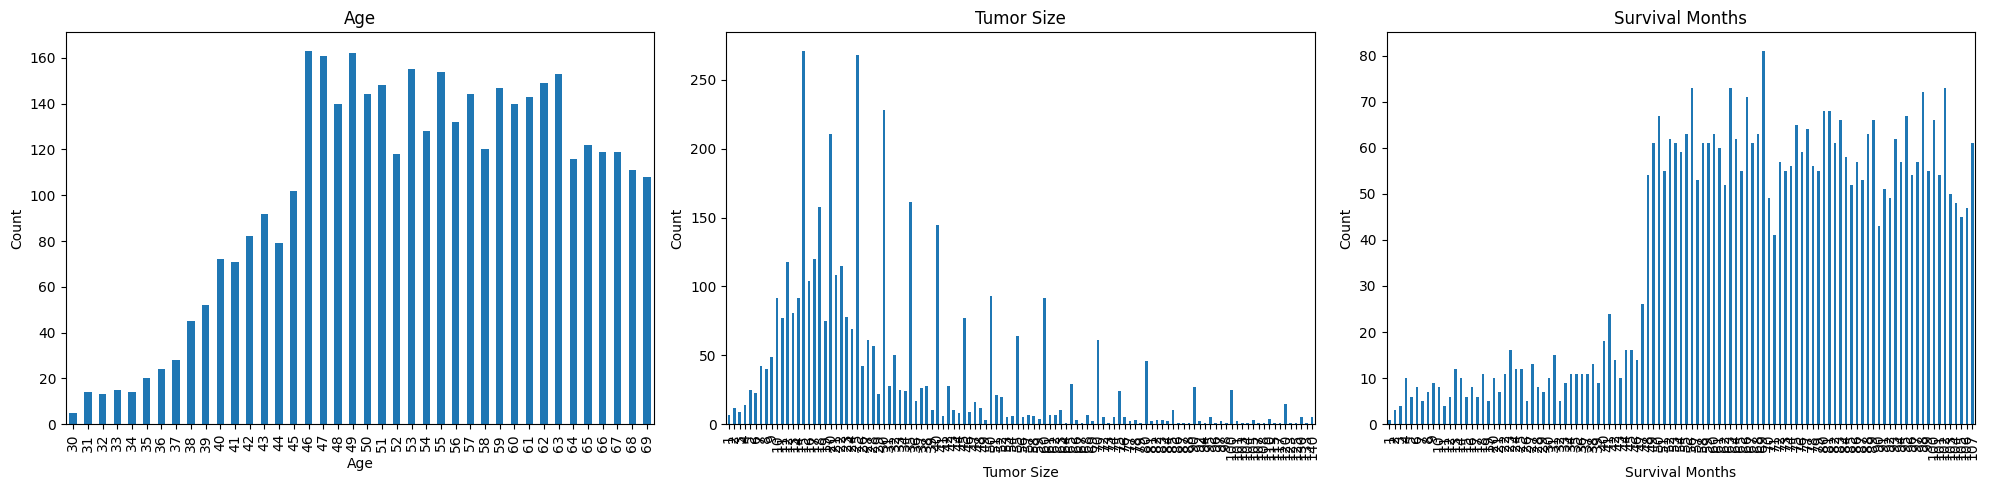

In [117]:
#Figure 2
large_cols = ['Age','Tumor Size','Survival Months']

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for ax, col in zip(axes.ravel(), large_cols):
    df[col].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

# Analytical Questions

The customer tasked the analysis team with deriving analytical questions they believe the dataset is postured to answer with no additional effort to collect data. Table 2 contains the questions the analyst team formulated and will be addressing in this analysis effort.

## Table 2

| Question Number | Question |
|---------|----------|
| 1 | Does age at initial diagnosis affect survivability?  |
| 2 | Does the size of a tumor at initial diagnosis affect survivability?  |
| 3 | How long is a patient likely to survive given an initial diagnosis of a <br>T4 T Stage compared to other stages of grades?  |
| 4 |Do less severe diagnoses (N1, IIA, Grade 1) play a part in survivability?  |

## Question 1: Does age at initial diagnosis affect survivability?

To answer this question, the analysis team will be looking at the relationship between 'Age' and 'Status' through different methods involving other parts of the dataset.

To begin, Figure 3 shows the raw distribution of ages involved in the study.

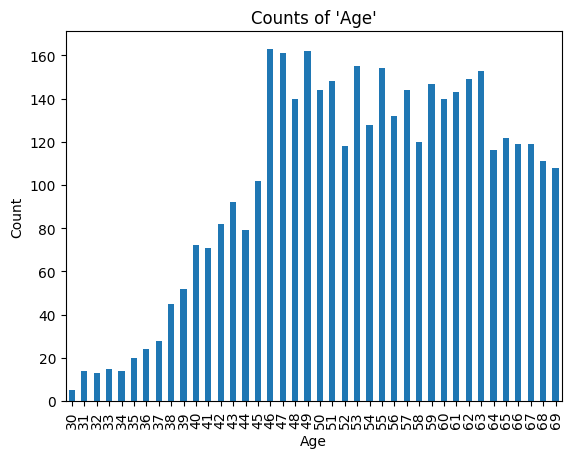

In [118]:
#Figure 3 TODO: Figures need titles and axes
df['Age'].value_counts().sort_index().plot(kind='bar')
plt.title("Counts of 'Age'")
plt.ylabel("Count")
plt.xlabel("Age")
plt.show()

At first glance, there are 100+ patients with ages between 46 years old and 69 years old per age group, sharply outweighing the age groups of 45 and under. This may imply Breast Cancer is more common in women older than 45. This may also be because it has become standard practice in the United States to get screened for breast cancer at the age of 45 and a result of the screenings is there are more cases.

Now that there is a clear dividing line, we can test to see how age affects survivability. If an older patient is diagnosed with breast cancer, are they more or less likely to die than their younger counterpart?

In [119]:
#Create new Pandas Dataframes of patients 45yo and under and over 45yo
df_over_45 = df[df["Age"] > 45]
df_under_45 = df[df["Age"] <= 45]

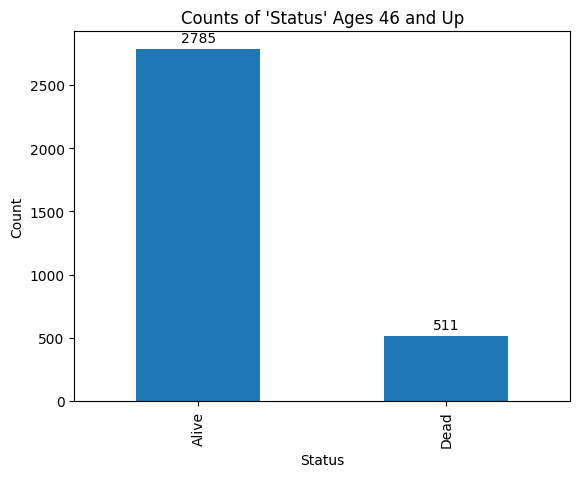

In [120]:
#Figure 4 Alive and Dead raw counts Over 45 Dataframe
counts = df_over_45['Status'].value_counts().sort_index()
nums = counts.plot(kind='bar')
plt.bar_label(nums.containers[0], padding=3)
plt.title("Counts of 'Status' Ages 46 and Up")
plt.ylabel("Count")
plt.xlabel("Status")
plt.show()

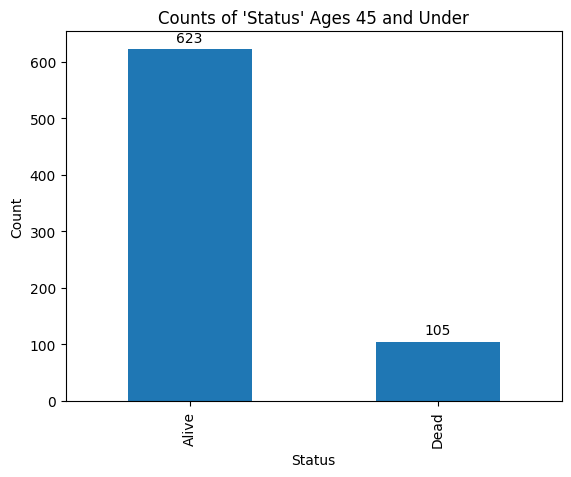

In [121]:
#Figure 5 Alive and Dead raw counts Over 45 Dataframe
counts = df_under_45['Status'].value_counts().sort_index()
nums = counts.plot(kind='bar')
plt.bar_label(nums.containers[0], padding=3)
plt.title("Counts of 'Status' Ages 45 and Under")
plt.ylabel("Count")
plt.xlabel("Status")
plt.show()

Please note the ratio of dead patients to alive patients between the two datasets is similar. This is proven in the tables below showing the ratios of alive and dead patients in each dataset.

In [122]:
df_under_45['Status'].value_counts(normalize=True)

,proportion
Status,
Alive,0.855769
Dead,0.144231


In [123]:
df_over_45['Status'].value_counts(normalize=True)

,proportion
Status,
Alive,0.844964
Dead,0.155036


###Tumor Detection
Let's first look at how patient age affects tumor detection. As it was stated above, the recommended age to begin routine screening for breast cancer is 45. If the analysis team assumes all patients followed that recommendation, other signs and symoptoms were used to detect tumors before the age of 46. This analysis may point to how large a tumor may need to be to be detectable using non-state-of-the-are techniques used in screening proceedures. Figure 6 and 7 show the tumor size raw distributions in each dataset.

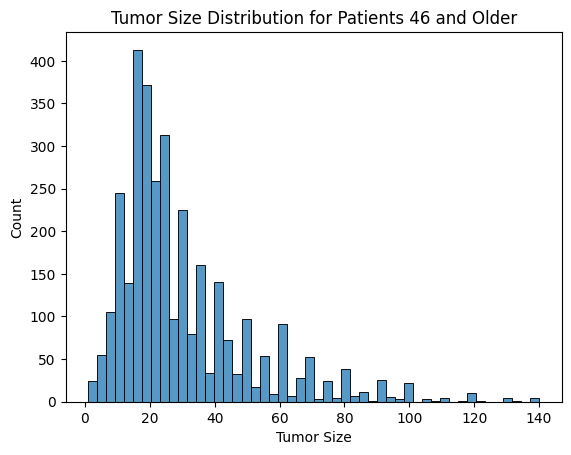

In [124]:
#Figure 6 Raw distribution of tumor sizes in patients 46yo and older
sns.histplot(df_over_45["Tumor Size"])
plt.title("Tumor Size Distribution for Patients 46 and Older")
plt.xlabel("Tumor Size")
plt.ylabel("Count")
plt.show()

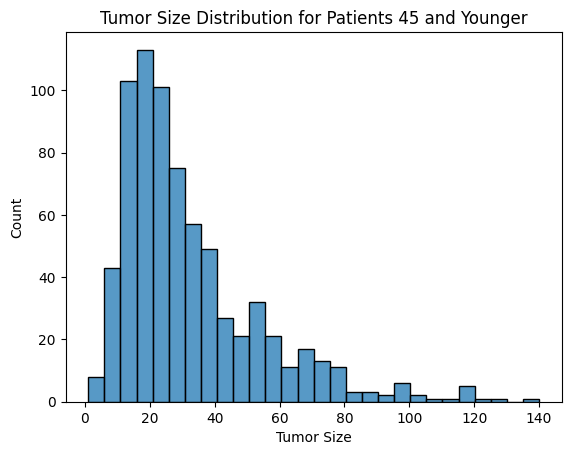

In [125]:
#Figure 7 Raw distribution of tumor sizes in patients 46yo and older
sns.histplot(df_under_45["Tumor Size"])
plt.title("Tumor Size Distribution for Patients 45 and Younger")
plt.xlabel("Tumor Size")
plt.ylabel("Count")
plt.show()

Figure 8 shows a bivariate analysis showing tumor sizes when found and the age of the patient. The data seen in Figure 8 is normalized to make a fair comparison between the two datasets.

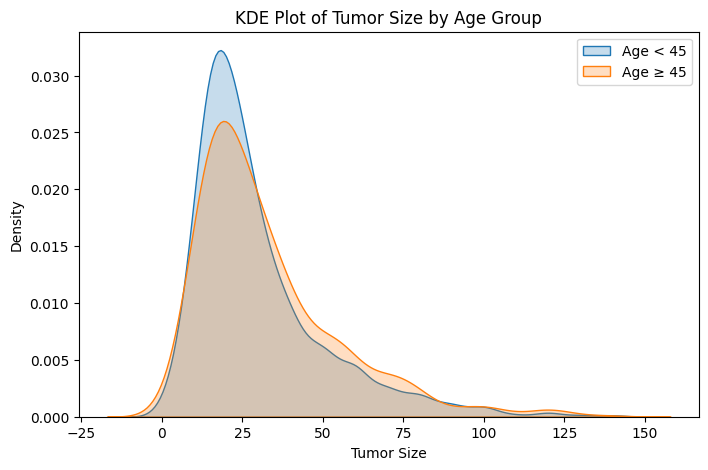

In [126]:
plt.figure(figsize=(8,5))

sns.kdeplot(
    data=df_over_45["Tumor Size"],
    label="Age < 45",
    fill=True
)

sns.kdeplot(
    data=df_under_45["Tumor Size"],
    label="Age ≥ 45",
    fill=True
)

plt.title("KDE Plot of Tumor Size by Age Group")
plt.xlabel("Tumor Size")
plt.ylabel("Density")
plt.legend()
plt.show()

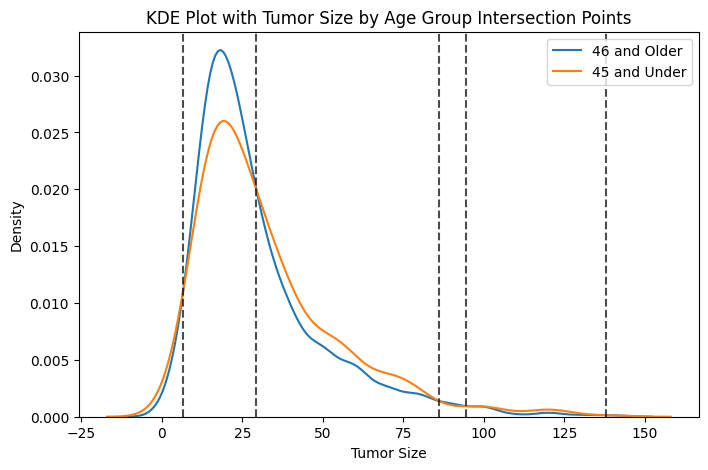

Intersection points: [  6.57114228  29.13426854  85.95991984  94.59519038 138.0501002 ]


In [127]:
#Figure 9 shows the points where both plot intersect
#This code was largely written with the assistance of AI
x1 = df_over_45["Tumor Size"]
x2 = df_under_45["Tumor Size"]

# Fit KDEs manually (needed to compute intersections)
kde1 = gaussian_kde(x1)
kde2 = gaussian_kde(x2)

# Shared x-grid
xs = np.linspace(min(x1.min(), x2.min()),
                 max(x1.max(), x2.max()),
                 500)

y1 = kde1(xs)
y2 = kde2(xs)

# Find intersection points
diff = y1 - y2
sign_changes = np.where(np.diff(np.sign(diff)))[0]

intersection_x = xs[sign_changes]

# Plot curves
plt.figure(figsize=(8,5))
sns.kdeplot(x1, label='46 and Older')
sns.kdeplot(x2, label='45 and Under')

# Add vertical lines at intersections
for x in intersection_x:
    plt.axvline(x, color='black', linestyle='--', alpha=0.7)

plt.title("KDE Plot with Tumor Size by Age Group Intersection Points")
plt.legend()
plt.show()

print("Intersection points:", intersection_x)

Though Figure 9 shows many points at which the liklyhood of detecting a tumor prior to screening changes, but the major change comes at the tumor size of 29 mm where patients that are 45 and younger are more likely to be diagnosed with a larger tumor.

###Cancer Stage and Survivability

In this section, we will be looking at normalized survivability results that compare the two age groups diagnosed with similar stages of breast cancer. As Table 1 shows, there are 4 ways breast cancer was graded in this study, A Stage, T Stage, N Stage, and 6th Stage. The discriptions of eeach stage can be found in Table 1.

For this analysis each dataset will be divided into the various cancer stages for comparison.

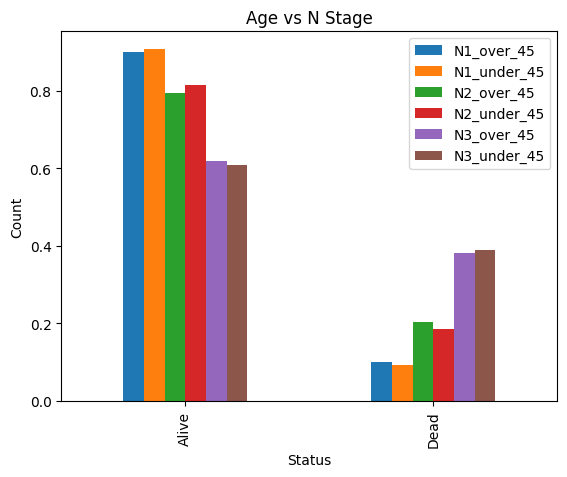

In [128]:
#Figure 10 N Stage Comparison
N1_over_45 = df_over_45[(df_over_45['N Stage'] == 'N1')]
N2_over_45 = df_over_45[(df_over_45['N Stage'] == 'N2')]
N3_over_45 = df_over_45[(df_over_45['N Stage'] == 'N3')]
N1_under_45 = df_under_45[(df_under_45['N Stage'] == 'N1')]
N2_under_45 = df_under_45[(df_under_45['N Stage'] == 'N2')]
N3_under_45 = df_under_45[(df_under_45['N Stage'] == 'N3')]

s1 = N1_over_45['Status'].value_counts(normalize=True).sort_index()
s3 = N2_over_45['Status'].value_counts(normalize=True).sort_index()
s5 = N3_over_45['Status'].value_counts(normalize=True).sort_index()
s2 = N1_under_45['Status'].value_counts(normalize=True).sort_index()
s4 = N2_under_45['Status'].value_counts(normalize=True).sort_index()
s6 = N3_under_45['Status'].value_counts(normalize=True).sort_index()


combined_N = pd.DataFrame({'N1_over_45': s1, 'N1_under_45': s2, 'N2_over_45': s3, 'N2_under_45': s4, 'N3_over_45': s5, 'N3_under_45': s6})
combined_N.plot(kind='bar')
plt.title("Age vs N Stage")
plt.ylabel("Count")
plt.show()

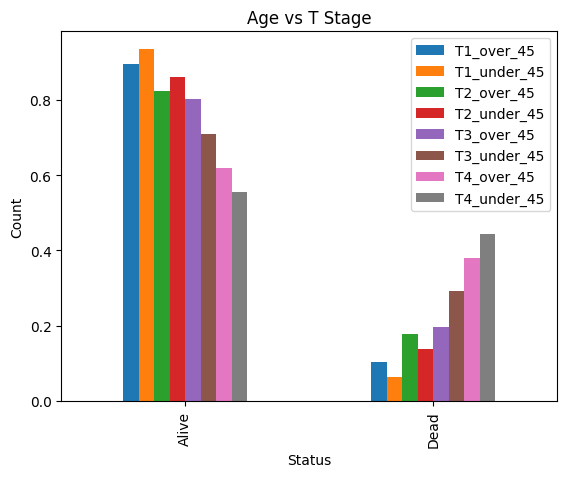

In [129]:
#Figure 11 T Stage Comparison
T1_over_45 = df_over_45[(df_over_45['T Stage'] == 'T1')]
T2_over_45 = df_over_45[(df_over_45['T Stage'] == 'T2')]
T3_over_45 = df_over_45[(df_over_45['T Stage'] == 'T3')]
T4_over_45 = df_over_45[(df_over_45['T Stage'] == 'T4')]
T1_under_45 = df_under_45[(df_under_45['T Stage'] == 'T1')]
T2_under_45 = df_under_45[(df_under_45['T Stage'] == 'T2')]
T3_under_45 = df_under_45[(df_under_45['T Stage'] == 'T3')]
T4_under_45 = df_under_45[(df_under_45['T Stage'] == 'T4')]

s1 = T1_over_45['Status'].value_counts(normalize=True).sort_index()
s3 = T2_over_45['Status'].value_counts(normalize=True).sort_index()
s5 = T3_over_45['Status'].value_counts(normalize=True).sort_index()
s7 = T4_over_45['Status'].value_counts(normalize=True).sort_index()
s2 = T1_under_45['Status'].value_counts(normalize=True).sort_index()
s4 = T2_under_45['Status'].value_counts(normalize=True).sort_index()
s6 = T3_under_45['Status'].value_counts(normalize=True).sort_index()
s8 = T4_under_45['Status'].value_counts(normalize=True).sort_index()



combined_T = pd.DataFrame({'T1_over_45': s1, 'T1_under_45': s2, 'T2_over_45': s3, 'T2_under_45': s4, 'T3_over_45': s5, 'T3_under_45': s6, 'T4_over_45': s7, 'T4_under_45': s8})
combined_T.plot(kind='bar')
plt.title("Age vs T Stage")
plt.ylabel("Count")
plt.show()

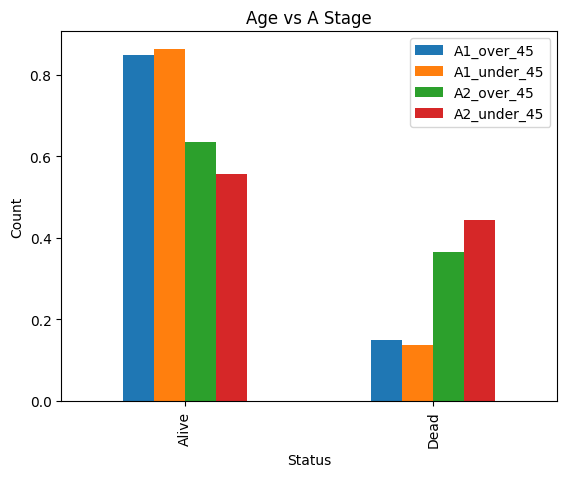

In [130]:
#Figure 12 A Stage Comparison
A1_over_45 = df_over_45[(df_over_45['A Stage'] == 'Regional')]
A2_over_45 = df_over_45[(df_over_45['A Stage'] == 'Distant')]
A1_under_45 = df_under_45[(df_under_45['A Stage'] == 'Regional')]
A2_under_45 = df_under_45[(df_under_45['A Stage'] == 'Distant')]

s1 = A1_over_45['Status'].value_counts(normalize=True).sort_index()
s3 = A2_over_45['Status'].value_counts(normalize=True).sort_index()
s2 = A1_under_45['Status'].value_counts(normalize=True).sort_index()
s4 = A2_under_45['Status'].value_counts(normalize=True).sort_index()

combined_A = pd.DataFrame({'A1_over_45': s1, 'A1_under_45': s2, 'A2_over_45': s3, 'A2_under_45': s4})
combined_A.plot(kind='bar')
plt.title("Age vs A Stage")
plt.ylabel("Count")
plt.show()

<Figure size 1200x1200 with 0 Axes>

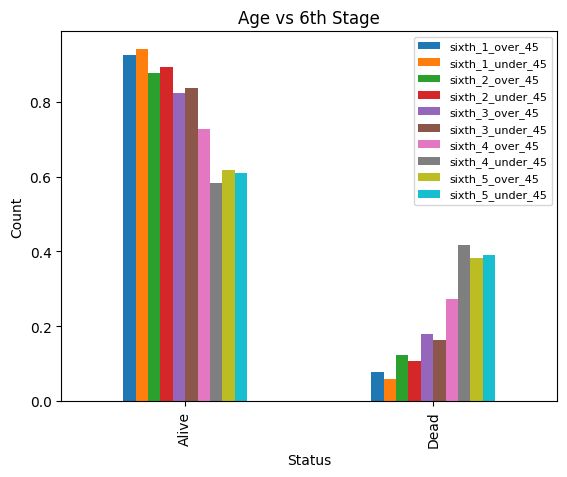

In [131]:
#Figure 13 6th Stage Comparison
sixth_1_over_45 = df_over_45[(df_over_45['6th Stage'] == 'IIA')]
sixth_2_over_45 = df_over_45[(df_over_45['6th Stage'] == 'IIB')]
sixth_3_over_45 = df_over_45[(df_over_45['6th Stage'] == 'IIIA')]
sixth_4_over_45 = df_over_45[(df_over_45['6th Stage'] == 'IIIB')]
sixth_5_over_45 = df_over_45[(df_over_45['6th Stage'] == 'IIIC')]
sixth_1_under_45 = df_under_45[(df_under_45['6th Stage'] == 'IIA')]
sixth_2_under_45 = df_under_45[(df_under_45['6th Stage'] == 'IIB')]
sixth_3_under_45 = df_under_45[(df_under_45['6th Stage'] == 'IIIA')]
sixth_4_under_45 = df_under_45[(df_under_45['6th Stage'] == 'IIIB')]
sixth_5_under_45 = df_under_45[(df_under_45['6th Stage'] == 'IIIC')]

s1 = sixth_1_over_45['Status'].value_counts(normalize=True).sort_index()
s3 = sixth_2_over_45['Status'].value_counts(normalize=True).sort_index()
s5 = sixth_3_over_45['Status'].value_counts(normalize=True).sort_index()
s7 = sixth_4_over_45['Status'].value_counts(normalize=True).sort_index()
s9 = sixth_5_over_45['Status'].value_counts(normalize=True).sort_index()
s2 = sixth_1_under_45['Status'].value_counts(normalize=True).sort_index()
s4 = sixth_2_under_45['Status'].value_counts(normalize=True).sort_index()
s6 = sixth_3_under_45['Status'].value_counts(normalize=True).sort_index()
s8 = sixth_4_under_45['Status'].value_counts(normalize=True).sort_index()
s10 = sixth_5_under_45['Status'].value_counts(normalize=True).sort_index()

plt.figure(figsize=(12, 12))
combined_sixth = pd.DataFrame({'sixth_1_over_45': s1, 'sixth_1_under_45': s2, 'sixth_2_over_45': s3, 'sixth_2_under_45': s4, 'sixth_3_over_45': s5, 'sixth_3_under_45': s6, 'sixth_4_over_45': s7, 'sixth_4_under_45': s8, 'sixth_5_over_45': s9, 'sixth_5_under_45': s10})
combined_sixth.plot(kind='bar')
#plt.figure(figsize=(10, 6))
plt.legend(fontsize=8)
plt.title("Age vs 6th Stage")
plt.ylabel("Count")
plt.show()


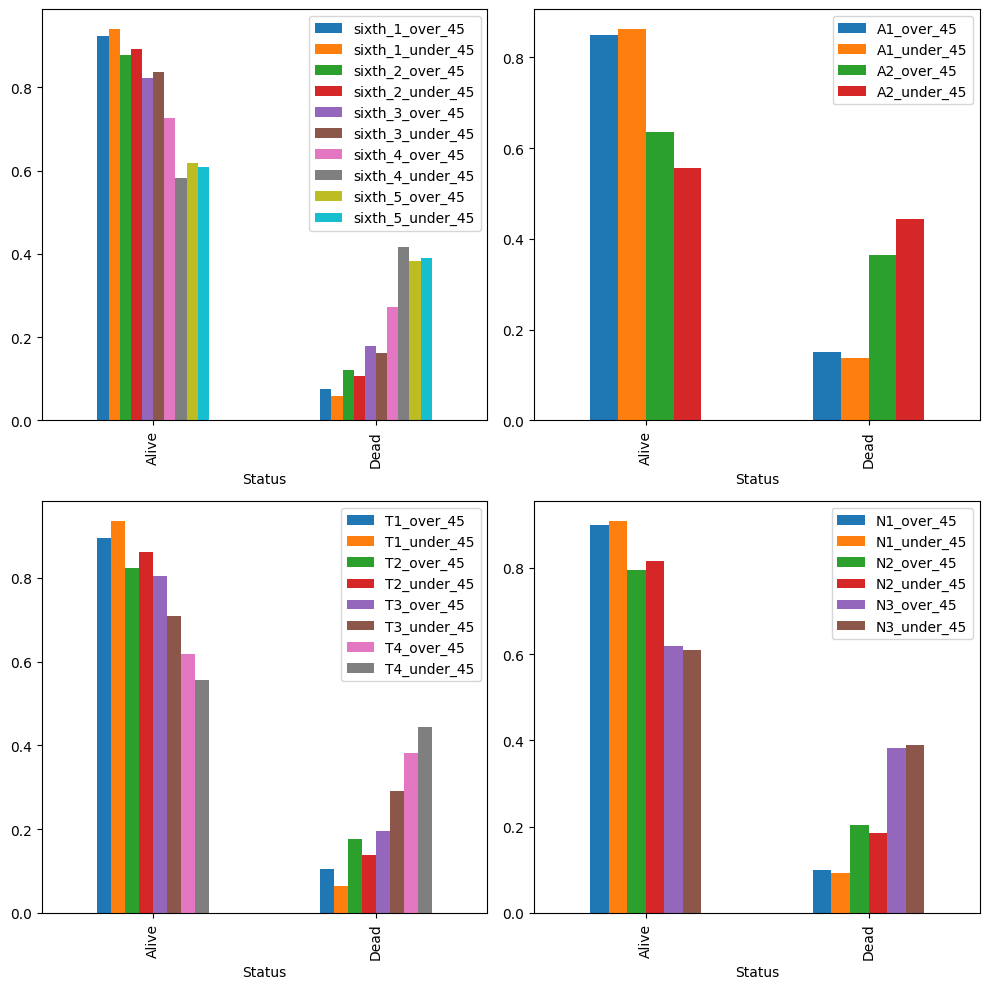

In [132]:
#Figure 14 2x2 grid with Figures 10 - 13
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Flatten axes for easier looping
axs = axes.flatten()

# Your existing bar chart objects / Series
plots = [combined_sixth, combined_A, combined_T, combined_N]

for ax, dframes in zip(axs, plots):
    dframes.plot(kind='bar', ax=ax)

plt.tight_layout()
plt.show()

##Question 1 Conclusion

Based on the results of the survivability analysis comparing the ages of various patients with similar cancer stage diagnoses, the analysis team can conclude that the age of the patient does not play a significant role in their overall survivability.



## Question 2: How does tumor size at initial diagnosis affect patient survivability?

In this part of the investigation the analysis team will be looking at the relationship between reported tumor size at initial diagnosis and the recorded status of the patient at the conclusion of the study.

Figure 15 shows the raw value counts of tumor sizes recorded in the study.

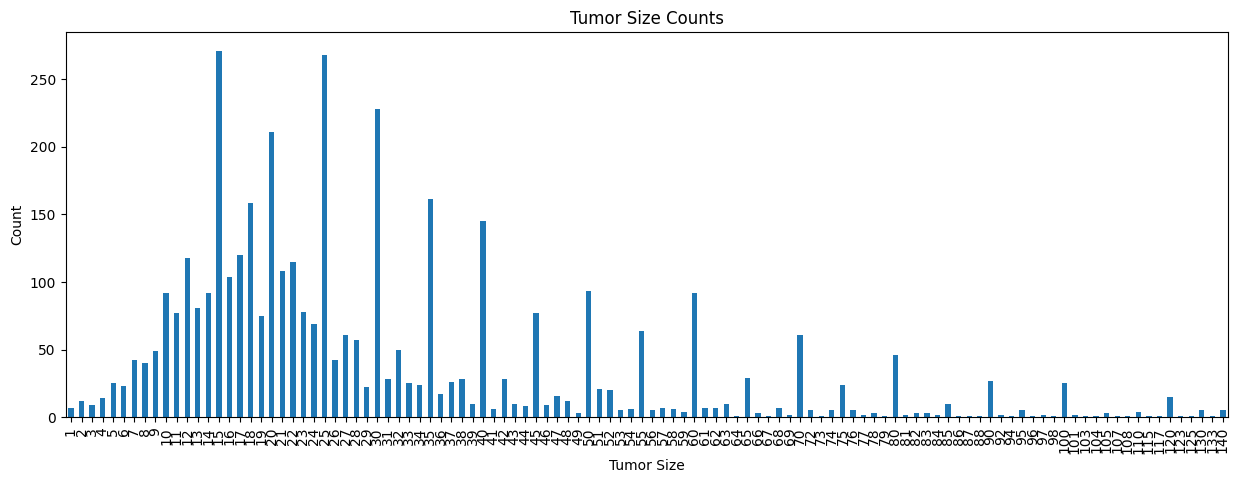

In [133]:
plt.figure(figsize=(15, 5))
df['Tumor Size'].value_counts().sort_index().plot(kind='bar')
plt.title("Tumor Size Counts")
plt.ylabel("Count")
plt.show()

Figure 16 shows a box plot and identifies how many potential outliers there are in this dataset.

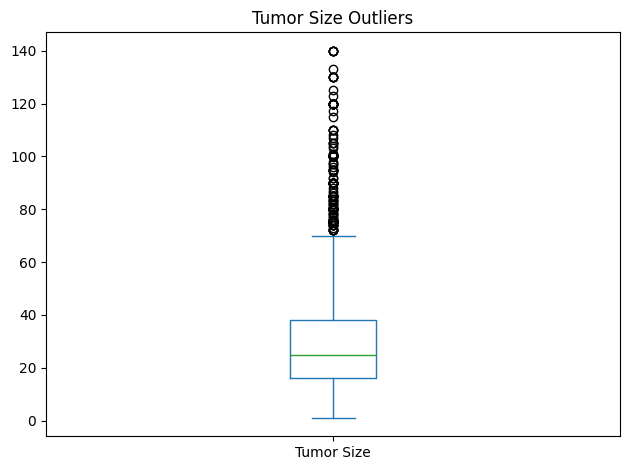

Number of flagged tumor outliers: 130


In [134]:
#Figure 16 Check for extreme values in Tumor Size
df['Tumor Size'].plot(kind='box', title="Tumor Size Outliers")
plt.tight_layout()
plt.show()



# Flag extreme tumor sizes (>80mm) for later analysis
df['TumorOutlier'] = (df['Tumor Size'] > 80).astype(int)
print("Number of flagged tumor outliers:", df['TumorOutlier'].sum())

In [135]:
#Another way of calculating extreme outliers is to determine which observations exist outside 3 x the Inter Quartile Range (IQR)

Q1 = df['Tumor Size'].quantile(0.25)
Q3 = df['Tumor Size'].quantile(0.75)
IQR = Q3 - Q1

lower_extreme = Q1 - 3 * IQR
upper_extreme = Q3 + 3 * IQR

extreme_outliers = df[(df['Tumor Size'] < lower_extreme) | (df['Tumor Size'] > upper_extreme)]


extreme_outlier_count = extreme_outliers.shape[0]

print("Extreme outliers:", extreme_outlier_count)

Extreme outliers: 39


This is proof that there are a wide range of observations in the dataset. Some extremes may also be a result of typographical errors. These outliers will remain in the dataset for this analysis. The outliers in either case account for less than 3% of the collected data.

As an asside, Figure 17 shows the Status of the patients who dealt with the 39 extreme cases captured in this dataset.

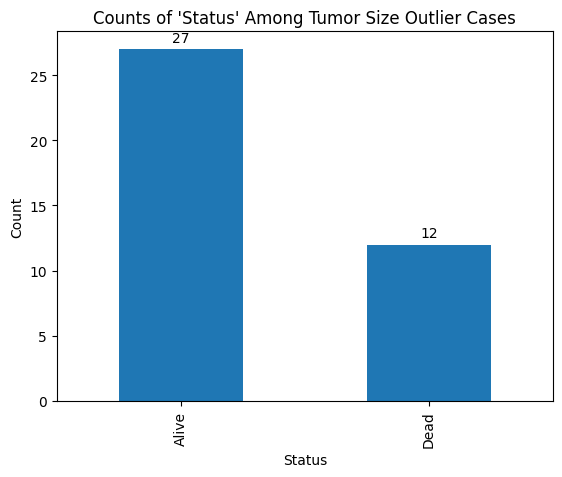

In [136]:
#Figure 17
counts = extreme_outliers['Status'].value_counts().sort_index()
nums = counts.plot(kind='bar')
plt.bar_label(nums.containers[0], padding=3)
plt.title("Counts of 'Status' Among Tumor Size Outlier Cases")
plt.ylabel("Count")
plt.xlabel("Status")
plt.show()

Though the survival rate among the rest of the cases is greater than 30%, even in extreme cases the survival rate is greater than 50% which is promiseing when talking to new patients.

A kde plot is used to capture the relationship between patient status at the conclusion of the study and tumor size at initial diagnosis. The kde plot can be seen in Figure 18. Figure 19 shows where the status plots intersect.

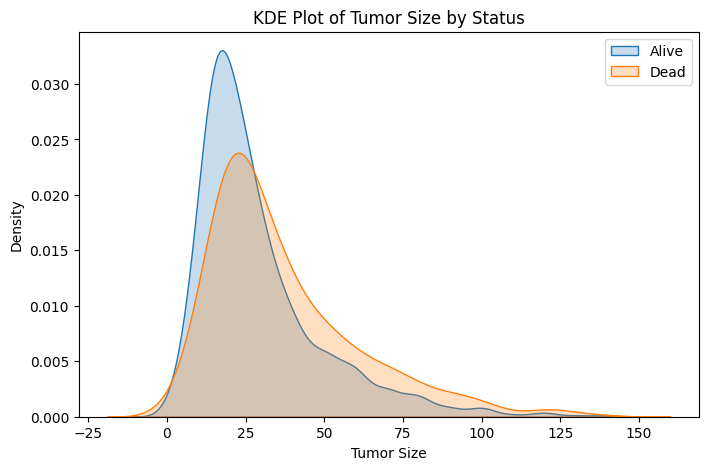

In [137]:
#Figure 18
alive_df = df[(df["Status"] == "Alive")]
dead_df = df[(df["Status"] == "Dead")]

plt.figure(figsize=(8,5))

sns.kdeplot(
    data=alive_df["Tumor Size"],
    label="Alive",
    fill=True
)

sns.kdeplot(
    data=dead_df["Tumor Size"],
    label="Dead",
    fill=True
)

plt.title("KDE Plot of Tumor Size by Status")
plt.xlabel("Tumor Size")
plt.ylabel("Density")
plt.legend()
plt.show()

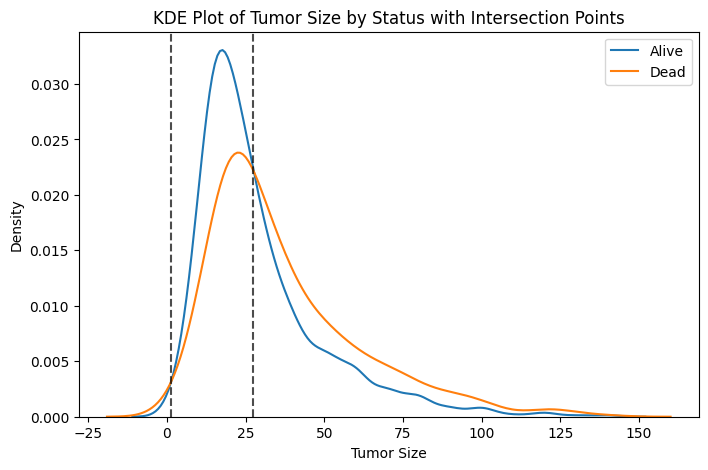

Intersection points: [ 1.27855711 27.46292585]


In [138]:
#Figure 19 shows the points where both plot intersect
#This code was largely written with the assistance of AI
x1 = alive_df["Tumor Size"]
x2 = dead_df["Tumor Size"]

# Fit KDEs manually (needed to compute intersections)
kde1 = gaussian_kde(x1)
kde2 = gaussian_kde(x2)

# Shared x-grid
xs = np.linspace(min(x1.min(), x2.min()),
                 max(x1.max(), x2.max()),
                 500)

y1 = kde1(xs)
y2 = kde2(xs)

# Find intersection points
diff = y1 - y2
sign_changes = np.where(np.diff(np.sign(diff)))[0]

intersection_x = xs[sign_changes]

# Plot curves
plt.figure(figsize=(8,5))
sns.kdeplot(x1, label='Alive')
sns.kdeplot(x2, label='Dead')

# Add vertical lines at intersections
for x in intersection_x:
    plt.axvline(x, color='black', linestyle='--', alpha=0.7)

plt.title("KDE Plot of Tumor Size by Status with Intersection Points")
plt.legend()
plt.show()

print("Intersection points:", intersection_x)

Based on Figure 19 shows an intersection at 27.5mm tumor size which is where the probability of survival is exactly 50%. Tumors larger than 27.5mm are more liklely to result in death when initially diagnosed.

## Question 2 Conclusion

Tumor size has a clear relationship with patient survivability. Though even in extreme cases the patient can survive cancer treatment, the likelihood of survival decreases dramatically once the tumor size reaches 27.5mm. when initially found.

Considering the findings from above indicating tumors are only more likely to be detected at 29mm, there is a dangerous overlap that could result in death if a patient avoids necessary screening.

## Question 3: How long is a patient likely to survive given an initial diagnosis of a T4 T Stage compared to other stages of grades?

In the analysis for Question 1 we already looked at how age affects survivability regarding various cancer stages. In this analysis we will be coming back to cancer grades and stages to determine how they affect the length of patient survivability.

As stated above, the 'Months Survived' metric in this dataset is problematic because it is not paired with a date of diagnosis so we cannot draw conclusions based solely on months survived.

The investigation will begin by looking at the data before proceeding to the analysis plan.

In [139]:
df['Survival Months'].describe()

,Survival Months
count,4024.000000
mean,71.297962
std,22.921430
min,1.000000
25%,56.000000
50%,73.000000
75%,90.000000
max,107.000000


Because of the problematic nature of the 'Survival Months' metric, the analysis team chose to work only with the observations involving dead patients. Included with this shift, an assumption for this analysis is that all measures of survival months accurately represent the time from initial diagnosis to death and do not begin at the beginning of the study.

Table 3 shows important information regarding df_dead, the dataset being used for this analysis.

In [140]:
#Table 3
dead_df['Survival Months'].describe()

,Survival Months
count,616.000000
mean,45.610390
std,23.966253
min,2.000000
25%,27.000000
50%,44.000000
75%,61.000000
max,102.000000


Figure 20 shows the raw distribution of survival months for all diseased patients.

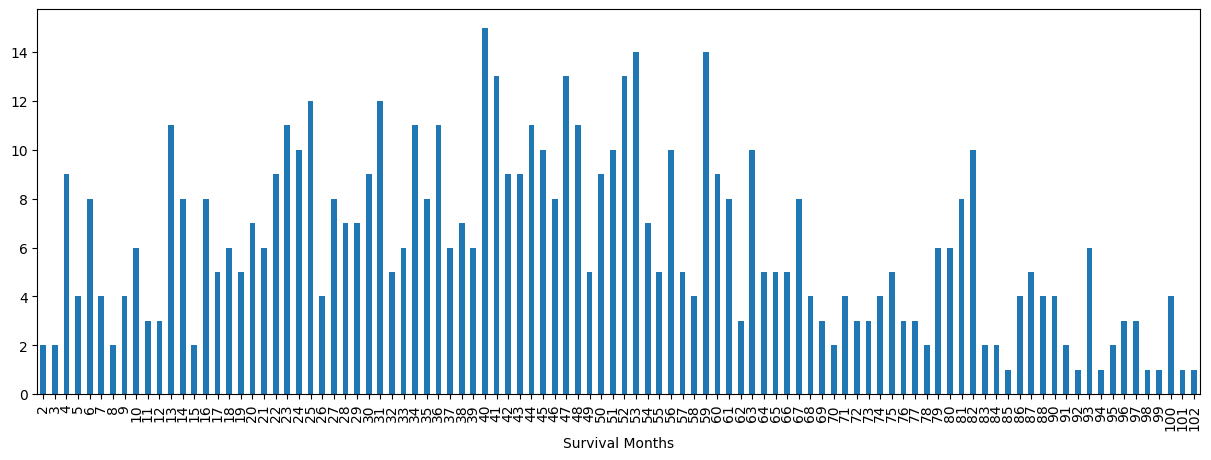

In [141]:
plt.figure(figsize=(15,5))
dead_df['Survival Months'].value_counts().sort_index().plot(kind='bar')
plt.show()

The distribution of Survival months within the current dataset is vase and it covers nearly the same range as the complete dataset.

To perform the analysis for this section, the team will need to compare the survival months distribution for patients initially diagnosed with a specific grade of cancer based on the four grades included in this study.

Figure 20 shows the different distributions for the different N stages.

Figure 20 shows the different distributions for the different T stages.

Figure 20 shows the different distributions for the different A stages.

Figure 20 shows the different distributions for the different 6th stages.


In [142]:
dead_df_n1 = dead_df[(dead_df['N Stage'] == 'N1')]
dead_df_n2 = dead_df[(dead_df['N Stage'] == 'N2')]
dead_df_n3 = dead_df[(dead_df['N Stage'] == 'N3')]

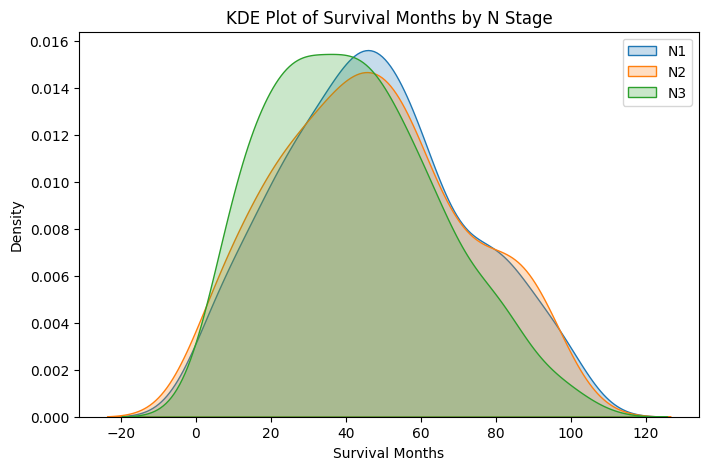

In [143]:
#Figure 20
#alive_df = df[(df["Status"] == "Alive")]
#dead_df = df[(df["Status"] == "Dead")]

plt.figure(figsize=(8,5))

sns.kdeplot(
    data=dead_df_n1["Survival Months"],
    label="N1",
    fill=True
)

sns.kdeplot(
    data=dead_df_n2["Survival Months"],
    label="N2",
    fill=True
)

sns.kdeplot(
    data=dead_df_n3["Survival Months"],
    label="N3",
    fill=True
)

plt.title("KDE Plot of Survival Months by N Stage")
plt.xlabel("Survival Months")
plt.ylabel("Density")
plt.legend()
plt.show()

In [144]:
dead_df_t1 = dead_df[(dead_df['T Stage'] == 'T1')]
dead_df_t2 = dead_df[(dead_df['T Stage'] == 'T2')]
dead_df_t3 = dead_df[(dead_df['T Stage'] == 'T3')]
dead_df_t4 = dead_df[(dead_df['T Stage'] == 'T4')]

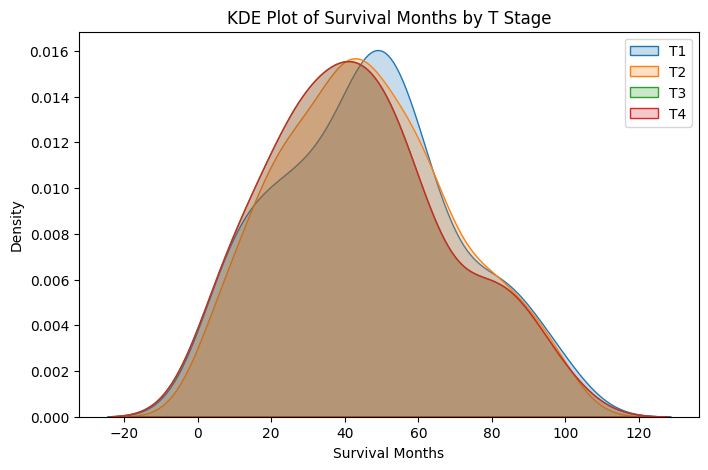

In [145]:
#Figure 21
#alive_df = df[(df["Status"] == "Alive")]
#dead_df = df[(df["Status"] == "Dead")]

plt.figure(figsize=(8,5))

sns.kdeplot(
    data=dead_df_t1["Survival Months"],
    label="T1",
    fill=True
)

sns.kdeplot(
    data=dead_df_t2["Survival Months"],
    label="T2",
    fill=True
)

sns.kdeplot(
    data=dead_df_t3["Survival Months"],
    label="T3",
    fill=True
)

sns.kdeplot(
    data=dead_df_t3["Survival Months"],
    label="T4",
    fill=True
)

plt.title("KDE Plot of Survival Months by T Stage")
plt.xlabel("Survival Months")
plt.ylabel("Density")
plt.legend()
plt.show()

In [146]:
dead_df_a1 = dead_df[(dead_df['A Stage'] == 'Regional')]
dead_df_a2 = dead_df[(dead_df['A Stage'] == 'Distant')]

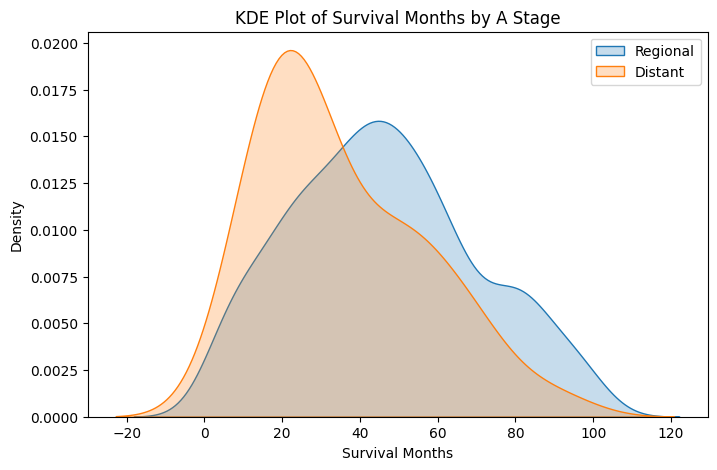

In [147]:
#Figure 22
#alive_df = df[(df["Status"] == "Alive")]
#dead_df = df[(df["Status"] == "Dead")]

plt.figure(figsize=(8,5))

sns.kdeplot(
    data=dead_df_a1["Survival Months"],
    label="Regional",
    fill=True
)

sns.kdeplot(
    data=dead_df_a2["Survival Months"],
    label="Distant",
    fill=True
)

plt.title("KDE Plot of Survival Months by A Stage")
plt.xlabel("Survival Months")
plt.ylabel("Density")
plt.legend()
plt.show()

In [148]:
dead_df_sixth_1 = dead_df[(dead_df['6th Stage'] == 'IIA')]
dead_df_sixth_2 = dead_df[(dead_df['6th Stage'] == 'IIB')]
dead_df_sixth_3 = dead_df[(dead_df['6th Stage'] == 'IIIA')]
dead_df_sixth_4 = dead_df[(dead_df['6th Stage'] == 'IIIB')]
dead_df_sixth_5 = dead_df[(dead_df['6th Stage'] == 'IIIC')]

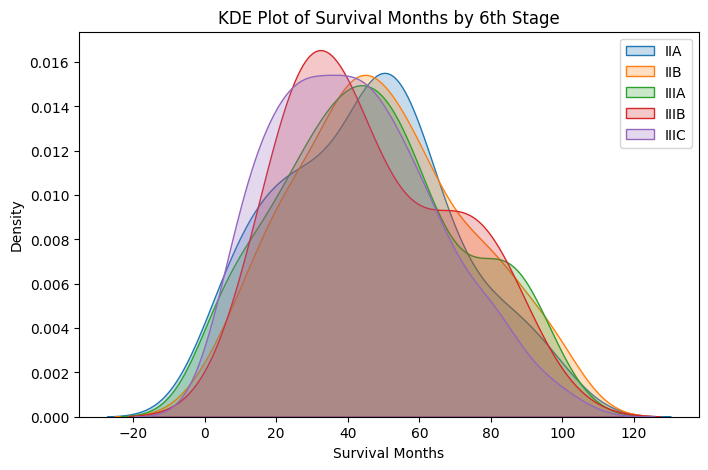

In [149]:
#Figure 23
#alive_df = df[(df["Status"] == "Alive")]
#dead_df = df[(df["Status"] == "Dead")]

plt.figure(figsize=(8,5))

sns.kdeplot(
    data=dead_df_sixth_1["Survival Months"],
    label="IIA",
    fill=True
)

sns.kdeplot(
    data=dead_df_sixth_2["Survival Months"],
    label="IIB",
    fill=True
)

sns.kdeplot(
    data=dead_df_sixth_3["Survival Months"],
    label="IIIA",
    fill=True
)

sns.kdeplot(
    data=dead_df_sixth_4["Survival Months"],
    label="IIIB",
    fill=True
)

sns.kdeplot(
    data=dead_df_sixth_5["Survival Months"],
    label="IIIC",
    fill=True
)

plt.title("KDE Plot of Survival Months by 6th Stage")
plt.xlabel("Survival Months")
plt.ylabel("Density")
plt.legend()
plt.show()

The most difficult to interpret is the chart displaying all five overlaping distributions of the 6th stage data.

The differenc in distributions is the most clearly identifiable when comparing the values of A Stage.

## Question 3 Conclusion

For Figures 20 - 23 a shift in the peak indicates systematic differences between the groups being compared. In Figure 20, the peak for the N1 group is clearly shifted to the right from the N3 group. This indicates a longer survival period for patients diagnosed with N1 stage cancer.

All milder diagnosis distributions (N1, T1, IIA, and Regional) show a difference in overall survival months that indicate a lengthier survival time.

# Question 4: Does an early or milder diagnosis play a part in survivability?

As stated above, the dataset being examined contains five ways to approach the grade of cancer at initial diagnosis. They are Grade, N Stage, T stage, A stage, and 6th Stage. Each methodoligy uses a different measure to determine the severity of a patients diagnosis.

This question can be answered by looking at the analyses previously done in this investigation by looking at the results from a different angle.

From Question 1, Figure 14 shows the comparison between 4 different stage diagnoses and how age can affect survivability.

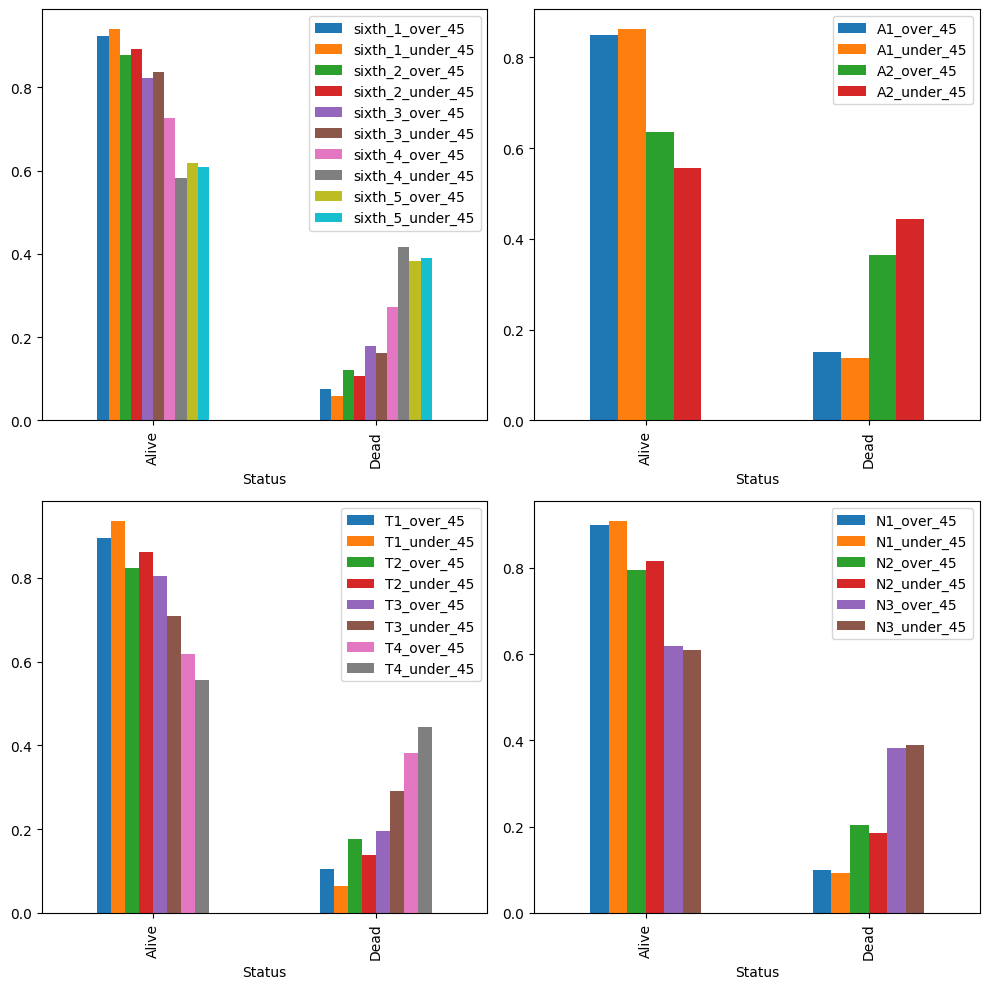

In [150]:
#Figure 14 2x2 grid with Figures 10 - 13
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Flatten axes for easier looping
axs = axes.flatten()

# Your existing bar chart objects / Series
plots = [combined_sixth, combined_A, combined_T, combined_N]

for ax, dframes in zip(axs, plots):
    dframes.plot(kind='bar', ax=ax)

plt.tight_layout()
plt.show()

Instead of comparing the age groups individually, the analysis team compared the survivability results between each stage of diagnosis. In the above example from Figure 14, a severe diagnosis of T4 or N3 reduces the liklyhood of survival by 20%.

In question 2 the analysis focused on tumor size. The analysis team concluded that tumor size at initial diagnosis played a part in overall survivability, to the extent that patients are more likly to die then survive if a tumor size is greater than 27.5mm. The chart from Question 2 is shown in Figure 19.

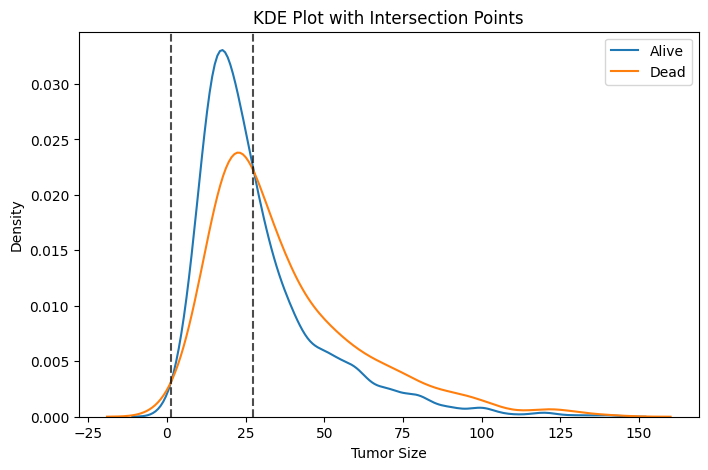

Intersection points: [ 1.27855711 27.46292585]


In [151]:
#Figure 19 shows the points where both plot intersect
#This code was largely written with the assistance of AI
x1 = alive_df["Tumor Size"]
x2 = dead_df["Tumor Size"]

# Fit KDEs manually (needed to compute intersections)
kde1 = gaussian_kde(x1)
kde2 = gaussian_kde(x2)

# Shared x-grid
xs = np.linspace(min(x1.min(), x2.min()),
                 max(x1.max(), x2.max()),
                 500)

y1 = kde1(xs)
y2 = kde2(xs)

# Find intersection points
diff = y1 - y2
sign_changes = np.where(np.diff(np.sign(diff)))[0]

intersection_x = xs[sign_changes]

# Plot curves
plt.figure(figsize=(8,5))
sns.kdeplot(x1, label='Alive')
sns.kdeplot(x2, label='Dead')

# Add vertical lines at intersections
for x in intersection_x:
    plt.axvline(x, color='black', linestyle='--', alpha=0.7)

plt.title("KDE Plot with Intersection Points")
plt.legend()
plt.show()

print("Intersection points:", intersection_x)

Because tumor size directly relates to T Stage, this conclusion is significant.

##Question 4 Conclusion
The results of the analyses in this report show a clear trend that proves the significance of the grades healthcare providers give their patients. In each case there is a clear distinction between being diagnosed with a cancer at N1 or T1 stage over being diagnosed at N3 or T4 stage. For each grading methodology, the likelihood of survival is reduced by +20% if a cancer is diagnosed at N3 or 6th IIIC rather than earlier on at N1 or 6th IIA.

These results indicate that treating a less severe stage or grade of cancer improves overall survivability. The results also prove the importance for early cancer screenings from qualified healthcare professionals.

#Conclusion

In question 1 the analysis team concluded age does not play a significant role in patient survivability. In question 2, it was concluded Tumor size plays a significant role in the survivability of a newly diagnosed patient. In question 3 the analysis team concluded the patients included in this study who died from breast cancer and were diagnosed with a milder grade or stage of cancer lived longer than a patient diagnosed with a more sever grade or stage. In question 4 the results from previous parts of this investigation were reexamined to determine if early diagnoses played a part in overall survivability of patients.

All of the results point to the need for all healthcare providers to continue to recommend periodic breast cancer screenings starting no later than 45 years old.

In question 2 it was concluded that a tumor the size 27.5mm was more likely to be lethal than smaller tumors, but that patients typically do not find tumors smaller than 29mm, assuming each patient is getting their screening. It is well known the instrumentation and methods used in breast cancer screening are very powerful and are getting more capable as AI becomes incorporated into cancer detection technologies. Screening at the recommended intervals will save the lives of countless patients going into the future.